In [1]:
#Day 10 AOC 23
with open("input.txt", "r") as file:
    puzzle_in = file.read().splitlines()
print(puzzle_in[:10])

with open("example.txt", "r") as file:
    example = file.read().splitlines()
print(example[:10])

['nmj: hvp', 'vbl: qfr', 'nmq: lrc', 'tlh: sxr xpb jtd lmd nrd', 'jch: kzn', 'kzj: lsm chx', 'rms: qjc', 'kzn: pbs', 'fsj: dch vcd kmq', 'xgs: cnd nbt vnp bqm zlh']
['jqt: rhn xhk nvd', 'rsh: frs pzl lsr', 'xhk: hfx', 'cmg: qnr nvd lhk bvb', 'rhn: xhk bvb hfx', 'bvb: xhk hfx', 'pzl: lsr hfx nvd', 'qnr: nvd', 'ntq: jqt hfx bvb xhk', 'nvd: lhk']


{'nmj': ['hvp', 'zrz', 'qlg', 'lnc', 'rsf', 'xcm', 'jqr', 'prm'], 'hvp': ['nmj', 'vjx', 'ktf', 'ftm'], 'vbl': ['qfr', 'ccb', 'zzt', 'zxz'], 'qfr': ['vbl', 'ccr', 'cdj', 'ckl', 'sjg', 'krq', 'cbz', 'dlv'], 'nmq': ['lrc', 'pqx', 'qzl', 'dfv'], 'lrc': ['nmq', 'rxc', 'xmm', 'xff', 'mhr', 'bvl'], 'tlh': ['sxr', 'xpb', 'jtd', 'lmd', 'nrd'], 'sxr': ['tlh', 'zzt', 'rtp', 'qlp'], 'xpb': ['tlh', 'thx', 'fbr', 'bbn'], 'jtd': ['tlh', 'nnh', 'tmd', 'rqf'], 'lmd': ['tlh', 'mkd', 'tbx', 'sqr', 'nhs'], 'nrd': ['tlh', 'jlk', 'cnc', 'sdf'], 'jch': ['kzn', 'vmf', 'fzx', 'btq', 'jbr'], 'kzn': ['jch', 'pbs', 'mgv', 'lrr'], 'kzj': ['lsm', 'chx', 'tfs', 'jxs'], 'lsm': ['kzj', 'cct', 'xhx', 'ztr', 'bgg'], 'chx': ['kzj', 'ddj', 'mvd', 'kbj', 'bdt'], 'rms': ['qjc', 'xxn', 'zrj', 'vnj'], 'qjc': ['rms', 'gzj', 'plx', 'rst'], 'pbs': ['kzn', 'kbl', 'ztk', 'cjj'], 'fsj': ['dch', 'vcd', 'kmq', 'xpq', 'qmb'], 'dch': ['fsj', 'ffz', 'lzj', 'cdl'], 'vcd': ['fsj', 'lmn', 'jtz', 'vff', 'ccf'], 'kmq': ['fsj', 'zlt', 'lkf', 

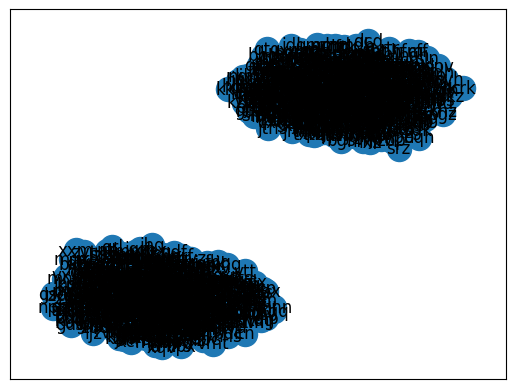

In [36]:
import networkx as nx

def create_connections_dict(data):
    connections = {}
    for line in data:
        name, cons = line.split(": ")
        cons = cons.split()
        connections[name] = connections.get(name, [])+ cons
        for con in cons:
            connections[con] = connections.get(con, []) + [name]
    return connections

def create_g(data):
    G = nx.Graph()
    for line in data:
        name, cons = line.split(": ")
        cons = cons.split()
        G.add_node(name)
        G.add_edges_from([(name, con) for con in cons])
    return G

def part1(data):
    connections = create_connections_dict(data)
    graph = create_g(data)
    print(connections)
    print(len(connections))
    print(graph)

    # trying to figure out the edges to remove
    #graph.remove_edge('vtt', 'fht')
    out = nx.connectivity.minimum_edge_cut(graph)
    print(out)
    graph.remove_edges_from(out)
    
    nx.draw_networkx(graph)
    cliques = nx.community.k_clique_communities(graph, 2)
    sizes = []
    for c in cliques:
        sizes.append(len(c))
        print(c)

    print(sizes, sizes[0]*sizes[1])
    
    return

part1(puzzle_in)